<a href="https://colab.research.google.com/github/ImaduddinAhmedMohammed/ImaduddinAhmed_INFO5731_Spring2024/blob/main/Mohammed_Imad_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [4]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
file_path = 'clean_csv_file_path.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and the column headers to understand its structure
data.head(), data.columns


# Extracting features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data['Cleaned User Review'])

# Display the shape of the TF-IDF matrix to confirm its size
tfidf.shape

# LDA Model
number_of_topics = 10
lda = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
lda.fit(tfidf)

# Getting the words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-11:-1]]  # Get the top 10 words for each topic

topics

"""
Summaries for top 10 Clusters are:
1) Praise: This topic captures positive and enthusiastic reviews where users
    express general satisfaction and appreciation for movies. The focus is on
    the enjoyable and memorable aspects of the films.
2) Critical Analysis: Reviews in this cluster tend to delve into more critical
    and analytical discussions, possibly weighing the pros and cons of the films,
    and critiquing specific elements like visual style and narrative techniques.
3) Narrative: Focused on the storytelling and technical craftsmanship of the films,
    this topic discusses aspects like sound design, political themes, and character
    development, reflecting a deeper engagement with the narrative structure.
4) Themes:  This cluster is centered around specific films (like "Oppenheimer")
    and directors (like Nolan), discussing themes specific to the works, such as
    historical events or character studies.
5) Personal Viewer Experience: Discusses the personal impact of the films on viewers,
    focusing on emotional responses, personal interpretations, and the artistic impression left by the movies.
6) Plot and Speculation:  Engages with plot details, speculative elements, and
    potential future implications of the storylines, often discussing predictions
    or hidden meanings within the films.
7) Film Impact and Elements:  This topic discusses the impactful elements of films, such as their soundtracks, theoretical bases, and clever storytelling techniques, often highlighting the intellectual and emotional impact on the audience.
8) Artistic Excellence: Celebrates films considered masterpieces or particularly exceptional works of cinema, focusing on their unique and groundbreaking elements and the genius behind their creation.
9) Production and Casting: Discusses aspects related to the production process, casting decisions, and overall execution, including the roles of actors and directors, as well as production choices.
10)Cultural and Social Commentary: Contains discussions that critique or reflect on broader cultural and social themes, often critiquing Hollywood standards or reflecting on human values depicted in the films.


{0: ['real',
  'terrific',
  'packed',
  'superb',
  'piece',
  'remember',
  'enjoy',
  'sure',
  'hoping',
  'wonderful'],
 1: ['hoping',
  'manages',
  'study',
  'maybe',
  'reviewer',
  'listen',
  'exciting',
  'virtually',
  'court',
  'visually'],
 2: ['sound',
  'think',
  'say',
  'especially',
  'case',
  'main',
  'day',
  'political',
  'experience',
  'development'],
 3: ['movie',
  'film',
  'oppenheimer',
  'nolan',
  'like',
  'time',
  'bomb',
  'best',
  'good',
  'character'],
 4: ['viewer',
  'edge',
  'artistic',
  'glad',
  'went',
  'winning',
  'personally',
  'maybe',
  'knowledge',
  'happy'],
 5: ['documentary',
  'believe',
  'speak',
  'plot',
  'future',
  'pushing',
  'inside',
  'particle',
  'era',
  'shoe'],
 6: ['important',
  'physic',
  'wonder',
  'help',
  'focus',
  'soundtrack',
  'perfect',
  'theoretical',
  'telling',
  'clever'],
 7: ['unique',
  'exceptional',
  'fast',
  'magnum',
  'opus',
  'genius',
  'breathtaking',
  'filmmaking',
  

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [3]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data_path = 'sentiment_analysis_movie_review.csv'
data = pd.read_csv(data_path)

# Display the dataset structure
print(data.head())
print(data.columns)

X = data['Cleaned User Review']
y = data['Sentiment']

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.20, random_state=42)

# Initialize models
model_rf = RandomForestClassifier(random_state=42)
model_lr = LogisticRegression(random_state=42)

# Train models
model_rf.fit(X_train, y_train)
model_lr.fit(X_train, y_train)

# Cross-validation
cv_rf = cross_val_score(model_rf, X_train, y_train, cv=10)
cv_lr = cross_val_score(model_lr, X_train, y_train, cv=10)

# Model Evaluation on Test Data
y_pred_rf = model_rf.predict(X_test)
y_pred_lr = model_lr.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
recall_lr = recall_score(y_test, y_pred_lr, average='weighted', zero_division=0)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted', zero_division=0)

# Print results
print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}")
print("Cross-validation scores:", cv_rf)

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr}, Precision: {precision_lr}, Recall: {recall_lr}, F1 Score: {f1_lr}")
print("Cross-validation scores:", cv_lr)





   document_id                                    Title of Review  \
0            0                              Murphy is exceptional   
1            1                             Quality but exhausting   
2            2  A brilliantly layered examination of a man thr...   
3            3  Nolan delivers a powerfull biopic that shows t...   
4            4                           And the Oscar goes to...   

                                 Cleaned User Review Sentiment  
0  youll wit brain fully switched watching oppenh...  Positive  
1  im big fan nolans work really looking forward ...   Neutral  
2  oppenheimer biographical thriller film written...  Positive  
3  movie wow dont think ever felt like watching m...  Positive  
4  im still collecting thought experiencing film ...  Positive  
Index(['document_id', 'Title of Review', 'Cleaned User Review', 'Sentiment'], dtype='object')
Random Forest Classifier Metrics:
Accuracy: 0.6, Precision: 0.36, Recall: 0.6, F1 Score: 0.4499999999

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [18]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Correct the file assignments
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train





,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [17]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [32]:
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        df_train[column].fillna(df_train[column].mode()[0], inplace=True)
    else:
        df_train[column].fillna(df_train[column].median(), inplace=True)

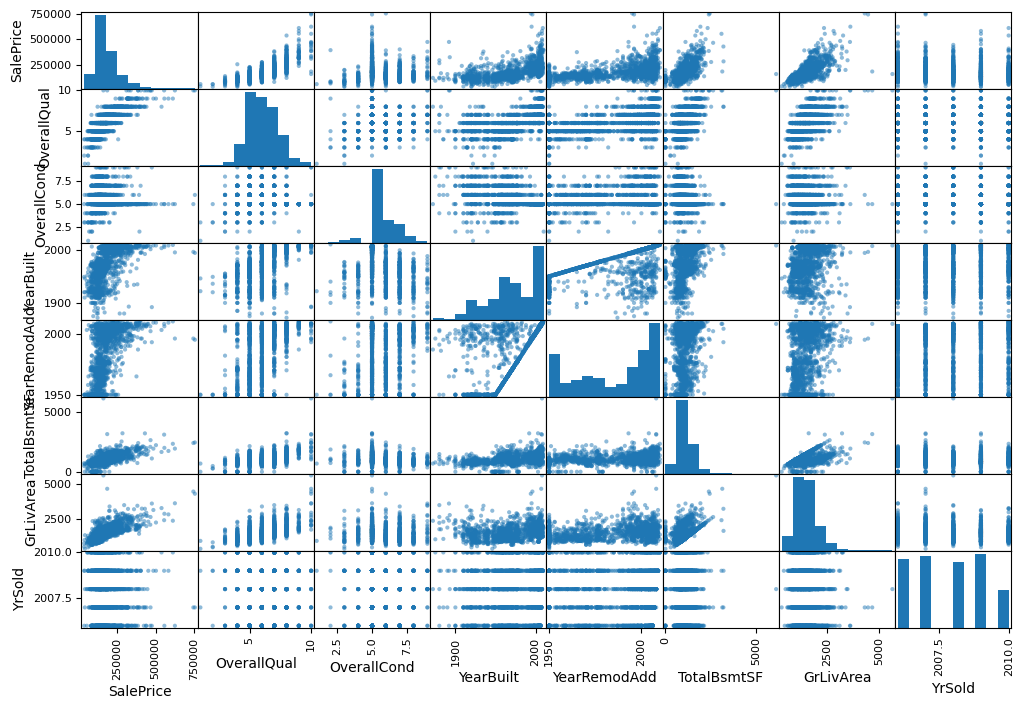

In [30]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

Selected_features = ["SalePrice", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", 'GrLivArea',"YrSold"]
# I selected the following features because I thought these features would be important in deducing the sales price.
scatter_matrix(df_train[Selected_features], figsize=(12, 8))
plt.savefig('matrix.png')

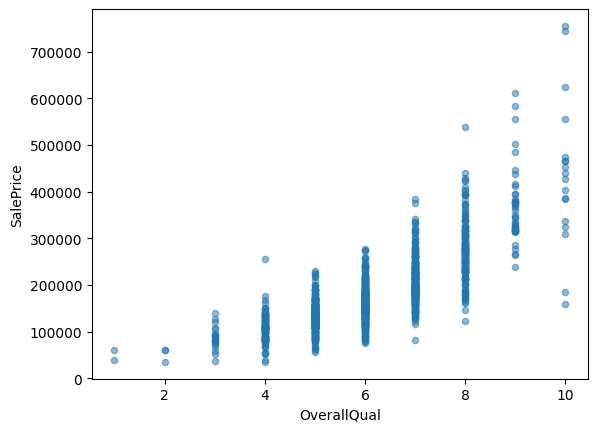

In [25]:
df_train.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)
plt.savefig('scatter.png')

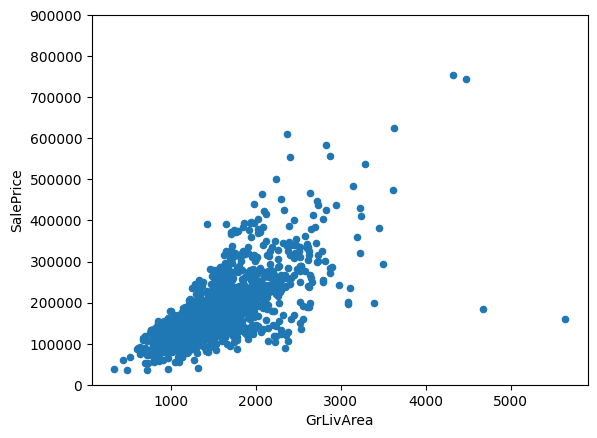

In [47]:
plotted_data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
plotted_data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,900000))
plt.savefig('scatter1.png')

In [42]:
from collections import Counter

column_cnt_train=df_train.select_dtypes(include=np.number).columns.tolist()
column_cnt_test=df_test.select_dtypes(include=np.number).columns.tolist()

colms=df_train.columns.values.tolist()
cnt= list((Counter(colms)-Counter(column_cnt_train)).elements())
df_test[column_cnt_test]=df_test[column_cnt_test].fillna(0)
df_train[column_cnt_train]=df_train[column_cnt_train].fillna(0)
#repalcing the empty list as unlabelled using fillna
df_test[cnt]=df_train[cnt].fillna('Unlabeled')
df_train[cnt]=df_train[cnt].fillna('Unlabeled')
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RL,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,Gd,MnPrv,Shed,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,6,2010,WD,Abnorml
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,Lvl,AllPub,...,144,0,Gd,MnPrv,Shed,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,FV,21.0,1936,Pave,Pave,Reg,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,6,2006,WD,Normal
1455,2916,160,RL,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,4,2006,WD,Normal
1456,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,9,2006,WD,Normal
1457,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,GdPrv,Shed,700,7,2006,WD,Normal


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

training_set = pd.get_dummies(df_train, columns=cnt)
X_train=training_set.drop(['SalePrice', 'Id'],axis=1)
y_train=training_set['SalePrice']

test_set = pd.get_dummies(df_test, columns=cnt)
X_test=test_set.drop(['Id'],axis=1)
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)

train_score = random_forest_regressor.score(X_train, y_train)
print("Training Score:", train_score)

predictions_data = random_forest_regressor.predict(X_test)
predicted_prices = pd.DataFrame({'Sale Price Prediction': predictions_data})

predicted_prices

Training Score: 0.9807666493587398


,Sale Price Prediction
0,132242.16
1,162074.50
2,190727.80
3,179213.50
4,195873.48
...,...
1454,85475.00
1455,85627.71
1456,161257.46
1457,120166.58


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [49]:
# Write your code here
import pandas as pd

file_path = 'sentiment_analysis_movie_review.csv'
data = pd.read_csv(file_path)

data.head()

,document_id,Title of Review,Cleaned User Review,Sentiment
0,0,Murphy is exceptional,youll wit brain fully switched watching oppenh...,Positive
1,1,Quality but exhausting,im big fan nolans work really looking forward ...,Neutral
2,2,A brilliantly layered examination of a man thr...,oppenheimer biographical thriller film written...,Positive
3,3,Nolan delivers a powerfull biopic that shows t...,movie wow dont think ever felt like watching m...,Positive
4,4,And the Oscar goes to...,im still collecting thought experiencing film ...,Positive


In [50]:
!pip install transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [55]:
from transformers import pipeline
import numpy as np

classifier = pipeline("zero-shot-classification", model="roberta-large-mnli")
labels = ["Positive", "Neutral", "Negative"]
hypothesis_template = "The sentiment of this review is {}."

def predict_sentiment(text):
    result = classifier(text, candidate_labels=labels, hypothesis_template="The sentiment of this review is {}.")
    return result["labels"][0]

batch_size = 10  # Adjust batch size based on your system capabilities
results = []

for i in range(0, len(data), batch_size):
    batch = data['Cleaned User Review'][i:i+batch_size].tolist()
    # Classify batch
    batch_results = classifier(batch, candidate_labels=labels, hypothesis_template=hypothesis_template)
    # Extract only the top label for each result
    top_labels = [result['labels'][0] for result in batch_results]
    results.extend(top_labels)
    print(f"Processed batch {i//batch_size + 1}/{len(data)//batch_size + 1}")  # Progress update

data['Predicted Sentiment'] = results

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Processed batch 1/11
Processed batch 2/11
Processed batch 3/11
Processed batch 4/11
Processed batch 5/11
Processed batch 6/11
Processed batch 7/11
Processed batch 8/11
Processed batch 9/11
Processed batch 10/11


In [56]:
# Model Description: roberta-large-mnli is the RoBERTa large model fine-tuned on the Multi-Genre Natural Language Inference (MNLI) corpus.
# The model is a pretrained model on English language text using a masked language modeling (MLM) objective.
# RoBERTa-large has around 355 million parameters.
# While RoBERTa was first trained on language modeling, this version has been optimized for natural language inference tasks using the MNLI dataset.
# As such, it can be used for zero-shot classification in situations where direct training data for the target task may not be available.

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(data['Sentiment'], data['Predicted Sentiment'])
precision, recall, f1, _ = precision_recall_fscore_support(data['Sentiment'], data['Predicted Sentiment'], average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

"""
 Advantages of RoBERTa:
1) It has Larger, Longer and More Varied Training Data
2) RoBERTa's robust training and diverse dataset make it particularly effective
   in zero-shot and few-shot learning scenarios, where only a small number of examples
   or none at all are available for a specific task.
3) RoBERTa modifies key hyperparameters in BERT, including removing the next-sentence
   pretraining objective and training with much larger mini-batches and learning rates.
   This leads to improved performance across.

 Disadvantages of RoBERTa:
1) Training RoBERTa requires significant GPU power and time.
2) Given its large number of parameters and extensive training data,
   there is a risk of overfitting, especially when applied to smaller or less diverse datasets.

 Challenges
1) The loading of PTM was difficult as I had no prior experience in doing so.
2) Had to rely on ChatGPT and Internet to load the model.
3) It was a good learning experience and got to gather knowledge about RoBERTa.


Accuracy: 0.62
Precision: 0.6141734279918863
Recall: 0.62
F1 Score: 0.6133169934640522
